In [1]:
from cellOpt import *
from plotfuncs import *

# Shape optimization example of optimization problem constrained with Laplaces equations with Dirichlet condition
Optimal solution is known by maximum principle. Comparison is made between different nr of quadrature points

## Coefficiant for initial guess and true solution and boundary condition function

In [2]:
a = 0.3; b = 5
def G(x, y): return Gr(a, b, x, y)


trueCoff = jnp.array([0, 0, a/2, 0, 0, 0, 0, 1, 0, 0, 0, 0, a/2])
trueLoss = konc(trueCoff, G, 32)
initCoff = findInitialGuess(trueCoff)
maxfreq = jnp.floor(len(initCoff)/2)
freq = jnp.linspace(-maxfreq, maxfreq, len(initCoff))

## Gradient descent with different nr of points

In [11]:
iterations, coffs, _, _, losses, _, _ = cellGradSearch(G, initCoff, True, maxiterations=31, tol=1e-6, n=16, gam=1/2)
iterations2, coffs2, _, _, losses2, _, _ = cellGradSearch(G, initCoff, True, maxiterations=31, tol=1e-6, n=4, gam=1/2)
iterations3, coffs3, _, _, losses3, _, _ = cellGradSearch(G, initCoff, True, maxiterations=31, tol=1e-6, n=32, gam=1/2)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28


## Plot to visualize convergence and error

Text(0.5, 1.0, 'Convergence')

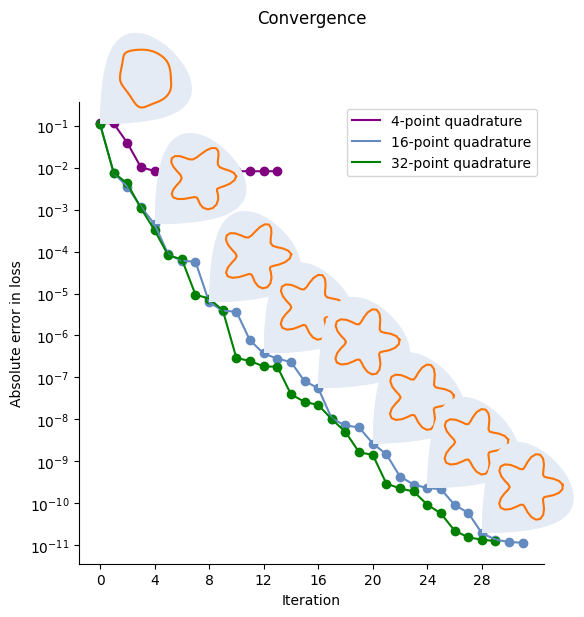

In [14]:

plt.figure(figsize=(6, 6))
ax = plt.gca()
t = jnp.linspace(0, jnp.pi*2, 50)
logerrors = jnp.log(trueLoss-jnp.array(losses))
logerrors2 = jnp.log(trueLoss-jnp.array(losses2))
logerrors3 = jnp.log(trueLoss-jnp.array(losses3))
err1, = ax.plot(iterations,logerrors, color='#648BC0')
plt.scatter(iterations, logerrors, color='#648BC0')
err2, = ax.plot(iterations2, logerrors2, color='purple')
plt.scatter(iterations2, logerrors2, color='purple')
err3, = ax.plot(iterations3, logerrors3, color='green')
plt.scatter(iterations3, logerrors3, color='green')
for i, it in enumerate(iterations[:-1:4]):
    (rx, ry) = vmap(Fourier(coffs[it]))(t)
    ax_inset = inset_at_point(ax, (it, logerrors[it]), 0.2, 0.2)
    ax_inset.plot(rx, ry, color="#fc7307")
    ax_inset.set_xlim(-1.75, 1.75)
    ax_inset.set_ylim(-1.75, 1.75)
    plot_background_highlight(ax_inset)
    ax_inset.axis("off")
labels = ['4-point quadrature', '16-point quadrature', '32-point quadrature']
lines = [err2, err1, err3]
plt.legend(handles=lines, labels=labels)
plt.yticks([(-i) for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]], [f"$10^{{-{i}}}$" for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])
plt.xticks(iterations[:-1:4])
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.xlabel("Iteration")
plt.ylabel("Absolute error in loss")
plt.title("Convergence")